# Bankrupt Prevention (Model Building)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')
print('Imported')

Imported


In [34]:
df = pd.read_csv('Datasets/pre_processed_data.csv')
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
1,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
2,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
3,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy


In [35]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [36]:
## separating dataset into independent and dependent variables
x = df.drop(columns=['class'], axis=1)
y = df['class']

In [37]:
## splitting the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
## shape of each variables
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((199, 6), (50, 6), (199,), (50,))

In [2]:
## standardize the sets
from sklearn.preprocessing import StandardScaler
import pickle
scaler = StandardScaler()
with open('pickle_files/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
print('standard scaler dumped')
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

standard scaler dumped


NameError: name 'x_train' is not defined

In [39]:
## checking the class categories
y_train.value_counts(), y_test.value_counts()

(non-bankruptcy    114
 bankruptcy         85
 Name: class, dtype: int64,
 non-bankruptcy    29
 bankruptcy        21
 Name: class, dtype: int64)

In [40]:
## using label encoder to encode the categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [41]:
## checking y_test and y_train
print('Y Train')
print('='*50)
print(y_train_encoded)
print('='*50)
print('Y Test')
print('='*50)
print(y_test_encoded)

Y Train
[1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1
 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0
 1 0 1 1 1 1 0 1 0 1 0 0 1 0]
Y Test
[1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 0]


In [42]:
## initializing cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

As, this is a classification problem we can use all the classification algorithm to check which algorithm fits best for the dataset.

In [43]:
## importing matrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix

## build a function for model validation
def evaluate_model(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    return accuracy, precision, f1

In [44]:
## importing various important classifier algorithms to check their model performance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

In [45]:
model_params = [
    ('Logistic Regression',
    LogisticRegression(),
    {
        'penalty':['l1','l2','elasticnet', None],
        'C' : [0.1, 0.3, 0.5, 0.7, 0.9],
        'solver' : ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'max_iter' : [100, 300, 500, 700, 900]
    }
    ),
    ('Decision Tree Classifier',
    DecisionTreeClassifier(),
     {
         'criterion' : ['gini', 'entropy'],
         'splitter' : ['best', 'random'],
         'max_depth': [x for x in range(0,5)],
         'min_samples_split' : [x for x in range(2,10, 2)],
         'min_samples_leaf' : [x for x in range(1,10, 3)],
         'max_features' : [x for x in range(0,5)],
      }
    ),
    ('Random Forest Classifier',
     RandomForestClassifier(),
     {
        'n_estimators' : [x*100 for x in range(1,10,2)],
        'criterion' : ['gini', 'entropy', 'log_loss'],
        'max_depth': [x for x in range(0,5)],
        'min_samples_split' : [x for x in range(2,10, 2)],
        'min_samples_leaf' : [x for x in range(1,10,3)],
        'min_weight_fraction_leaf' : [x/10 for x in range(1,10,3)],
        'max_features' : ['sqrt', 'log2', None],
     }
    ), 
    ('Gradient Boosting Classifier',
    GradientBoostingClassifier(),
     {
        'loss' : ['log_loss', 'exponential'],
        'learning_rate' : [x/10 for x in range(1,10,3)],
        'n_estimators' : [x*100 for x in range(1,10,2)],
        'subsample' : [x/10 for x in range(1,10,3)],
        'criterion' : ['friedman_mse', 'squared_error'],
        'min_samples_split' : [x for x in range(2,10, 2)],
        'min_samples_leaf' : [x for x in range(1,10,3)],
        'min_weight_fraction_leaf' : [x/10 for x in range(1,10,3)],
        'max_depth' : [x for x in range(3,10,2)],
        'max_features' : ['sqrt', 'log2'],
     }
    ),
    ('Extra Trees Classifier',
    ExtraTreesClassifier(),
     {
        'n_estimators' : [x*100 for x in range(1,10,2)],
        'criterion' : ['gini', 'entropy', 'log_loss'],
        'max_depth' : [x for x in range(3,10,2)],
        'min_samples_split' : [x for x in range(2,10, 2)],
        'min_samples_leaf' : [x for x in range(1,10,3)],
        'min_weight_fraction_leaf' : [x/10 for x in range(1,10,3)],
        'max_features' : ['sqrt', 'log2'],
     }
    ),
    ('Support Vector Classifier',
    SVC(),
     {
        'C' : [x/10 for x in range(1,10,3)],
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree' : [x for x in range(3,10,3)],
        'gamma' : ['scale', 'auto'],
        'coef0' : [x/10 for x in range(1,10,3)],
        'tol' : [x/1000 for x in range(1,10, 2)],
     }
    ), 
    ('K Nearest Neighbors Classifier',
    KNeighborsClassifier(),
     {
        'n_neighbors' : [x for x in range(1,10,3)],
        'weights' : ['uniform','distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [x for x in range(30,100,20)],
        'p' : [x for x in range(2,10,3)],
     }
    ),
    ('Adaboost Classifier',
     AdaBoostClassifier(),
     {
        'n_estimators' : [x*100 for x in range(1, 10, 2)],
        'learning_rate' : [x/10 for x in range(1,10,2)],
        'algorithm' : ['deprecated', 'SAMME'],
     }
    )
]

In [63]:
## Randomized Search CV Initialization
from sklearn.model_selection import RandomizedSearchCV
best_params_model = {}
for model_name, model, params in model_params:
    rcv = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='accuracy', cv=skf, n_jobs=-1, verbose=2)
    rcv.fit(x_train_scaled,y_train_encoded)
    best_params_model[model_name] = rcv.best_params_
    print('='*100)
    print(f'{model_name} has been Trained')
    print('='*100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression has been Trained
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Decision Tree Classifier has been Trained
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest Classifier has been Trained
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Gradient Boosting Classifier has been Trained
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Extra Trees Classifier has been Trained
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Support Vector Classifier has been Trained
Fitting 5 folds for each of 10 candidates, totalling 50 fits
K Nearest Neighbors Classifier has been Trained
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Adaboost Classifier has been Trained


In [64]:
for model in best_params_model:
    print(f'-------------------------- Best Params for {model} --------------------------')
    print(best_params_model[model])

-------------------------- Best Params for Logistic Regression --------------------------
{'solver': 'saga', 'penalty': None, 'max_iter': 900, 'C': 0.9}
-------------------------- Best Params for Decision Tree Classifier --------------------------
{'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 3, 'criterion': 'gini'}
-------------------------- Best Params for Random Forest Classifier --------------------------
{'n_estimators': 900, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 1, 'criterion': 'entropy'}
-------------------------- Best Params for Gradient Boosting Classifier --------------------------
{'subsample': 0.1, 'n_estimators': 500, 'min_weight_fraction_leaf': 0.1, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 3, 'loss': 'log_loss', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
-------------------------- Best Par

In [65]:
models_with_parameters = {
    'Logistic Regression': LogisticRegression(solver='saga', penalty=None, max_iter=900, C=0.7),
    'Decision Tree Classifier': DecisionTreeClassifier(splitter='best', min_samples_split=2, min_samples_leaf=7, max_features=3, max_depth=3, criterion='gini'),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=300, min_weight_fraction_leaf=0.1, min_samples_split=6, min_samples_leaf=7, max_features='log2', max_depth=3, criterion='log_loss'),
    'Gradient Boosting Classifier': GradientBoostingClassifier(subsample=0.1, n_estimators=900, min_weight_fraction_leaf=0.1, min_samples_split=4, min_samples_leaf=4, max_features='log2', max_depth=5, loss='log_loss', learning_rate=0.1, criterion='squared_error'),
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=900, min_weight_fraction_leaf=0.1, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=5, criterion='gini'),
    'Support Vector Classifier': SVC(tol=0.003, kernel='sigmoid', gamma='auto', degree=9, coef0=0.1, C=0.1),
    'K Nearest Neighbors Classifier': KNeighborsClassifier(weights='distance', p=2, n_neighbors=4, leaf_size=70, algorithm='brute'),
    'Adaboost Classifier': AdaBoostClassifier(n_estimators=100, learning_rate=0.1, algorithm='SAMME')
}

In [66]:
for model_name, model in models_with_parameters.items():
    ## fitting the model
    model.fit(x_train_scaled, y_train_encoded)
    ## make predictions
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)

    ## evaluate the model prediction
    train_accuracy, train_precision, train_f1 = evaluate_model(y_train_encoded, y_pred_train)
    test_accuracy, test_precision, test_f1 = evaluate_model(y_test_encoded, y_pred_test)

    ## Print the results
    print('='*50)
    print(model_name)
    print('-'*50)
    print('Model Performance for Training Set')
    print(f'**Accuracy Score** :: {np.round(train_accuracy, 2)}')
    print(f'**Precision Score** :: {np.round(train_precision, 2)}')
    print(f'**F1 Score** :: {np.round(train_f1, 2)}')
    print('-'*50)
    print('Model Performance for Testing Set')
    print(f'**Accuracy Score** :: {np.round(test_accuracy, 2)}')
    print(f'**Precision Score** :: {np.round(test_precision, 2)}')
    print(f'**F1 Score** :: {np.round(test_f1, 2)}')
    print('='*50)

Logistic Regression
--------------------------------------------------
Model Performance for Training Set
**Accuracy Score** :: 1.0
**Precision Score** :: 1.0
**F1 Score** :: 1.0
--------------------------------------------------
Model Performance for Testing Set
**Accuracy Score** :: 0.98
**Precision Score** :: 1.0
**F1 Score** :: 0.98
Decision Tree Classifier
--------------------------------------------------
Model Performance for Training Set
**Accuracy Score** :: 0.97
**Precision Score** :: 0.97
**F1 Score** :: 0.97
--------------------------------------------------
Model Performance for Testing Set
**Accuracy Score** :: 0.88
**Precision Score** :: 0.87
**F1 Score** :: 0.9
Random Forest Classifier
--------------------------------------------------
Model Performance for Training Set
**Accuracy Score** :: 1.0
**Precision Score** :: 1.0
**F1 Score** :: 1.0
--------------------------------------------------
Model Performance for Testing Set
**Accuracy Score** :: 1.0
**Precision Score**

In [67]:
metrics = []
for model_name, model in models_with_parameters.items():
    model.fit(x_train_scaled, y_train_encoded)
    ## make predictions
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)

    ## evaluate the model prediction
    train_accuracy, train_precision, train_f1 = evaluate_model(y_train_encoded, y_pred_train)
    test_accuracy, test_precision, test_f1 = evaluate_model(y_test_encoded, y_pred_test)

    metrics.append({
        'Model' : model_name,
        'Train Accuracy' : np.round(train_accuracy,2),
        'Test Accuracy' : np.round(test_accuracy, 2),
        'Accuracy Difference' : abs(np.round(train_accuracy,2) - np.round(test_accuracy, 2)),
        'Train Precision' : np.round(train_precision,2),
        'Test Precision' : np.round(test_precision, 2),
        'Precision Difference' : abs(np.round(train_precision,2) - np.round(test_precision, 2)),
        'Train F1' : np.round(train_f1,2),
        'Test F1' : np.round(test_f1,2),
        'F1 Difference' : abs(np.round(train_f1,2) - np.round(test_f1,2))
    })

In [68]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Train Accuracy,Test Accuracy,Accuracy Difference,Train Precision,Test Precision,Precision Difference,Train F1,Test F1,F1 Difference
0,Logistic Regression,1.00,0.98,0.02,1.00,1.00,0.00,1.00,0.98,0.02
1,Decision Tree Classifier,0.97,0.88,0.09,0.97,0.87,0.10,0.97,0.90,0.07
2,Random Forest Classifier,0.99,1.00,0.01,0.99,1.00,0.01,0.99,1.00,0.01
3,Gradient Boosting Classifier,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00
4,Extra Trees Classifier,0.99,1.00,0.01,0.99,1.00,0.01,1.00,1.00,0.00
5,Support Vector Classifier,0.99,1.00,0.01,0.99,1.00,0.01,1.00,1.00,0.00
6,K Nearest Neighbors Classifier,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00
7,Adaboost Classifier,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00


In [69]:
metrics_df.index=metrics_df['Model']

In [70]:
metrics_df.drop(columns='Model', inplace=True)

In [71]:
metrics_df

,Train Accuracy,Test Accuracy,Accuracy Difference,Train Precision,Test Precision,Precision Difference,Train F1,Test F1,F1 Difference
Model,,,,,,,,,
Logistic Regression,1.00,0.98,0.02,1.00,1.00,0.00,1.00,0.98,0.02
Decision Tree Classifier,0.97,0.88,0.09,0.97,0.87,0.10,0.97,0.90,0.07
Random Forest Classifier,0.99,1.00,0.01,0.99,1.00,0.01,0.99,1.00,0.01
Gradient Boosting Classifier,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00
Extra Trees Classifier,0.99,1.00,0.01,0.99,1.00,0.01,1.00,1.00,0.00
Support Vector Classifier,0.99,1.00,0.01,0.99,1.00,0.01,1.00,1.00,0.00
K Nearest Neighbors Classifier,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00
Adaboost Classifier,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00


In [72]:
df_diff = metrics_df[['Accuracy Difference', 'Precision Difference', 'F1 Difference']]
df_diff = df_diff.reset_index().melt(id_vars=["Model"], var_name="Metric", value_name="Value")

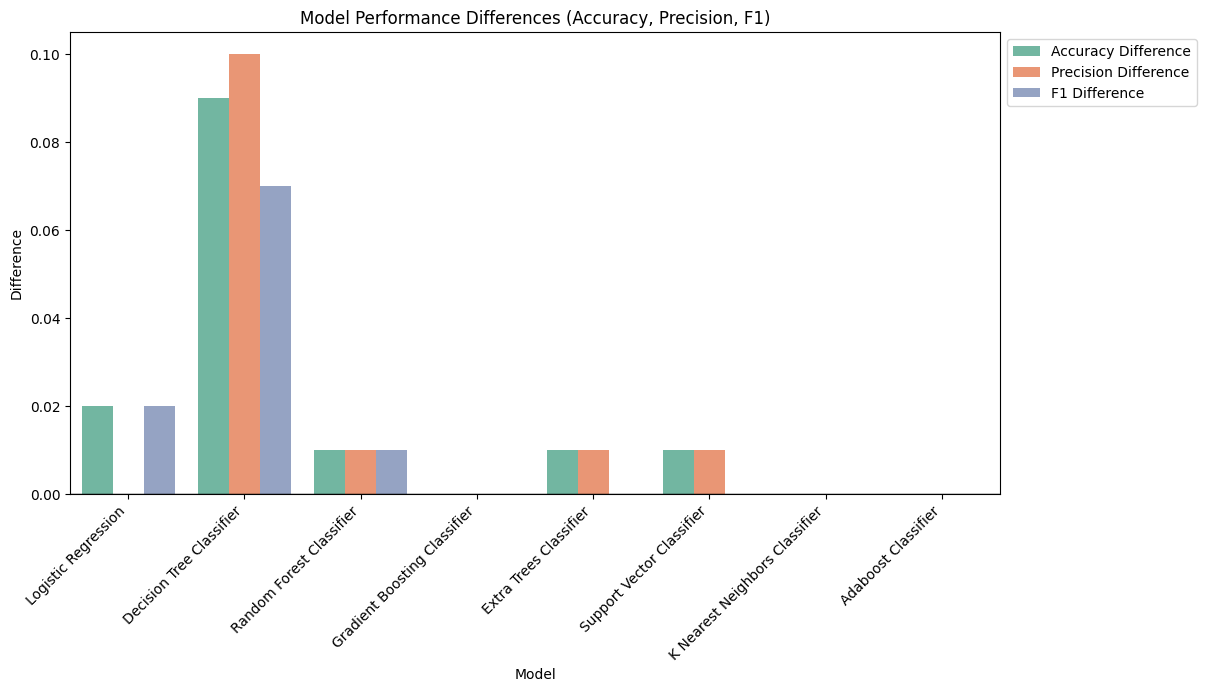

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_diff, x="Model", y="Value", hue="Metric", palette="Set2")
plt.xticks(rotation=45, ha="right")  
plt.axhline(0, color='black', linewidth=1)  
plt.title("Model Performance Differences (Accuracy, Precision, F1)")
plt.ylabel("Difference")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  
plt.show()

In [57]:
## pickling the random_forest_classifier for best_model
best_model = RandomForestClassifier(n_estimators=300, min_weight_fraction_leaf=0.1, min_samples_split=6, min_samples_leaf=7, max_features='log2', max_depth=3, criterion='log_loss')
best_model.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=3, max_features='log2',
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.1, n_estimators=300)

In [84]:
model_cross_val_score = cross_val_score(estimator=best_model,X=x, y=y, cv = skf, scoring='recall_macro')
print(f'Average Cross Validation Score = {round(np.mean(model_cross_val_score), 2)}')

Average Cross Validation Score = 0.99


In [85]:
df.sample(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
1,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
76,0.5,0.5,0.0,0.0,0.0,0.0,bankruptcy
188,0.5,0.0,1.0,1.0,1.0,0.0,non-bankruptcy
101,1.0,1.0,0.5,0.0,0.0,1.0,bankruptcy
148,0.5,1.0,1.0,0.5,1.0,1.0,non-bankruptcy
12,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
48,0.0,1.0,0.0,0.0,0.5,0.5,bankruptcy
153,0.5,0.0,1.0,1.0,1.0,1.0,non-bankruptcy
5,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
215,1.0,1.0,0.5,0.5,0.5,1.0,non-bankruptcy


In [101]:
best_model.predict([[0.5,0.5,0.0,0.0,0.0,0.0]])

array(['bankruptcy'], dtype=object)

In [102]:
best_model.predict_proba([[0.5,0.5,0.0,0.0,0.0,0.0]])

array([[0.90085415, 0.09914585]])

In [103]:
y_pred = best_model.predict(x_test)

In [104]:
classification_report(y_pred, y_test)

'                precision    recall  f1-score   support\n\n    bankruptcy       1.00      1.00      1.00        21\nnon-bankruptcy       1.00      1.00      1.00        29\n\n      accuracy                           1.00        50\n     macro avg       1.00      1.00      1.00        50\n  weighted avg       1.00      1.00      1.00        50\n'

#### The classification report states that the accuracy, precision, recall and F1 Score is 100%